In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [2]:
embeddings = np.load('embeddings.npy')

In [3]:
embeddings.shape

(22260, 64)

In [4]:
u_embeddings = np.unique(embeddings, axis=0)

In [5]:
u_embeddings.shape

(106, 64)

In [9]:
pca = PCA(n_components=2)

In [10]:
reduced_embeddings = pca.fit_transform(u_embeddings)

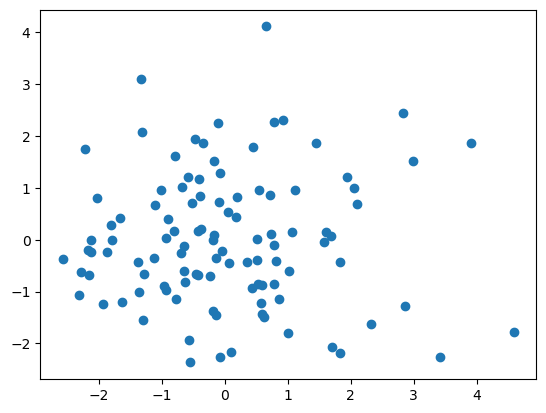

In [12]:
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.show()

In [14]:
df = pd.read_csv('embeddings_log.csv')

In [20]:
df['anchor'][0]

'[ 0.28057462 -0.11340071  0.16415249  0.12482376 -0.18415713  0.2651436\n -0.03771532 -0.03657772  0.12863058 -0.25437936 -0.71712273 -1.104657\n  0.21213636 -0.12606592 -0.14621188  0.31711766  0.6742575  -0.07889944\n  0.07894216  0.04167836 -0.50465345  0.06289098 -0.01416424  0.9359784\n  0.2448721   0.0817109  -0.34227195 -0.36890578 -0.25657412  0.62048197\n  0.3117741  -0.46998107  0.4081781   0.3008735  -0.3430242  -0.24001348\n -0.29969686  0.24373528  0.02724001 -0.39493626 -0.08621803 -0.00204317\n -0.32213154  0.3295682  -0.36154044 -0.17891921  0.18108682  0.01460321\n -0.44470823 -0.06043752 -0.4063362   0.24926552  0.48734912 -0.12614505\n  0.22781135  0.13369708 -0.24312925  0.32943255 -0.30642503  0.08528976\n -0.35765937 -0.10471594  0.37698027 -0.08235115]'

In [32]:
anchor = pd.read_csv('anchor_log.csv').drop(columns=['Unnamed: 0'])
pos = pd.read_csv('pos_log.csv').drop(columns=['Unnamed: 0'])
neg = pd.read_csv('neg_log.csv').drop(columns=['Unnamed: 0'])

In [30]:
anchor.head()

0         1         2         3         4         5         6  \
0 -0.659265  0.219756  0.518904 -0.062152  0.095999 -0.083070  0.700448   
1 -0.051158  0.740572 -0.641487  0.275775  0.235109 -0.293246 -0.817483   
2  0.237380 -0.035230 -0.215784 -0.425500 -0.025519 -0.262651  0.073716   
3 -0.171239 -0.907613 -0.057036 -0.032417  0.012099  0.398897  0.431953   
4 -0.174011  0.464438  0.460738 -0.248000  0.461089  0.084529 -0.169600   

          7         8         9  ...        54        55        56        57  \
0 -0.204502  0.317333  0.211764  ...  0.128825  0.505062 -0.494975 -0.150554   
1  0.938720 -0.054060 -0.596348  ...  0.042105  0.266165  0.346838 -0.064333   
2 -0.037611 -0.500320 -0.143442  ...  0.107740  0.195963 -0.201851 -0.325466   
3 -0.285247 -0.108210  0.600910  ...  0.451290  0.122857 -0.650354 -0.525488   
4  0.303741 -0.554858  0.158205  ... -0.082837  0.064745  0.076380 -0.001596   

         58        59        60        61        62        63  
0 -0.079900 -0.363726 -0.181786 -0.134055  0.060324 -0.081410  
1 -0.286925 -0.105854  0.067337  0.716288  0.194575  0.000212  
2 -0.134404  0.563010 -0.833564  0.316736  0.591775  0.162134  
3  0.209203 -0.176721 -0.989211 -0.395763  0.753424  0.469945  
4  0.146296 -0.135919  0.040407 -0.558660  0.115068  0.557939  

[5 rows x 64 columns]

In [33]:
anchor = np.array(anchor)
pos = np.array(pos)
neg = np.array(neg)

In [35]:
anchor_pca = PCA(n_components=2)
pos_pca = PCA(n_components=2)
neg_pca = PCA(n_components=2)

In [36]:
reduced_anchor = anchor_pca.fit_transform(anchor)
pos_anchor = anchor_pca.fit_transform(pos)
neg_anchor = anchor_pca.fit_transform(neg)

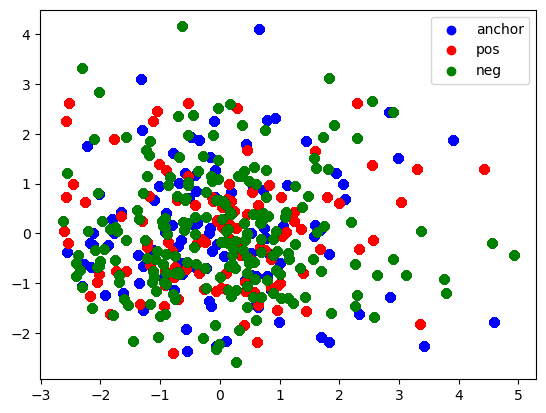

In [75]:
plt.scatter(reduced_anchor[:, 0], reduced_anchor[:, 1], color='blue', label='anchor')
plt.scatter(pos_anchor[:, 0], pos_anchor[:, 1], color='red', label='pos')
plt.scatter(neg_anchor[:, 0], neg_anchor[:, 1], color='green', label='neg')
plt.legend()
plt.show()

In [51]:
anchor_pos = anchor - pos
anchor_neg = anchor - neg

In [52]:
ap_pca = PCA(n_components=2)
an_pca = PCA(n_components=2)

In [53]:
reduced_ap = ap_pca.fit_transform(anchor_pos)
reduced_an = an_pca.fit_transform(anchor_neg)

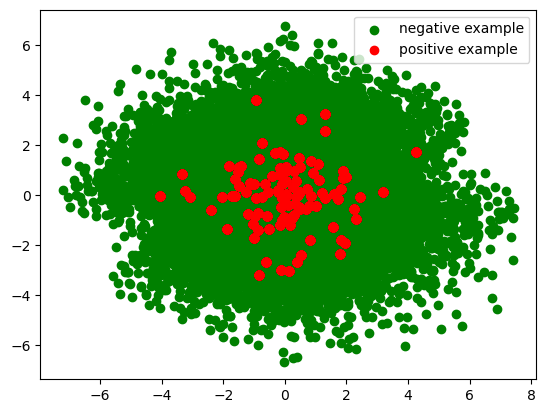

In [84]:
plt.scatter(reduced_an[:, 0], reduced_an[:, 1], color='green', label='negative example')
plt.scatter(reduced_ap[:, 0], reduced_ap[:, 1], color='red', label='positive example')
plt.legend()
plt.show()

In [86]:
ap_3d_pca = PCA(n_components=3)
an_3d_pca = PCA(n_components=3)

reduced_ap_3d = ap_3d_pca.fit_transform(anchor_pos)
reduced_an_3d = ap_3d_pca.fit_transform(anchor_neg)

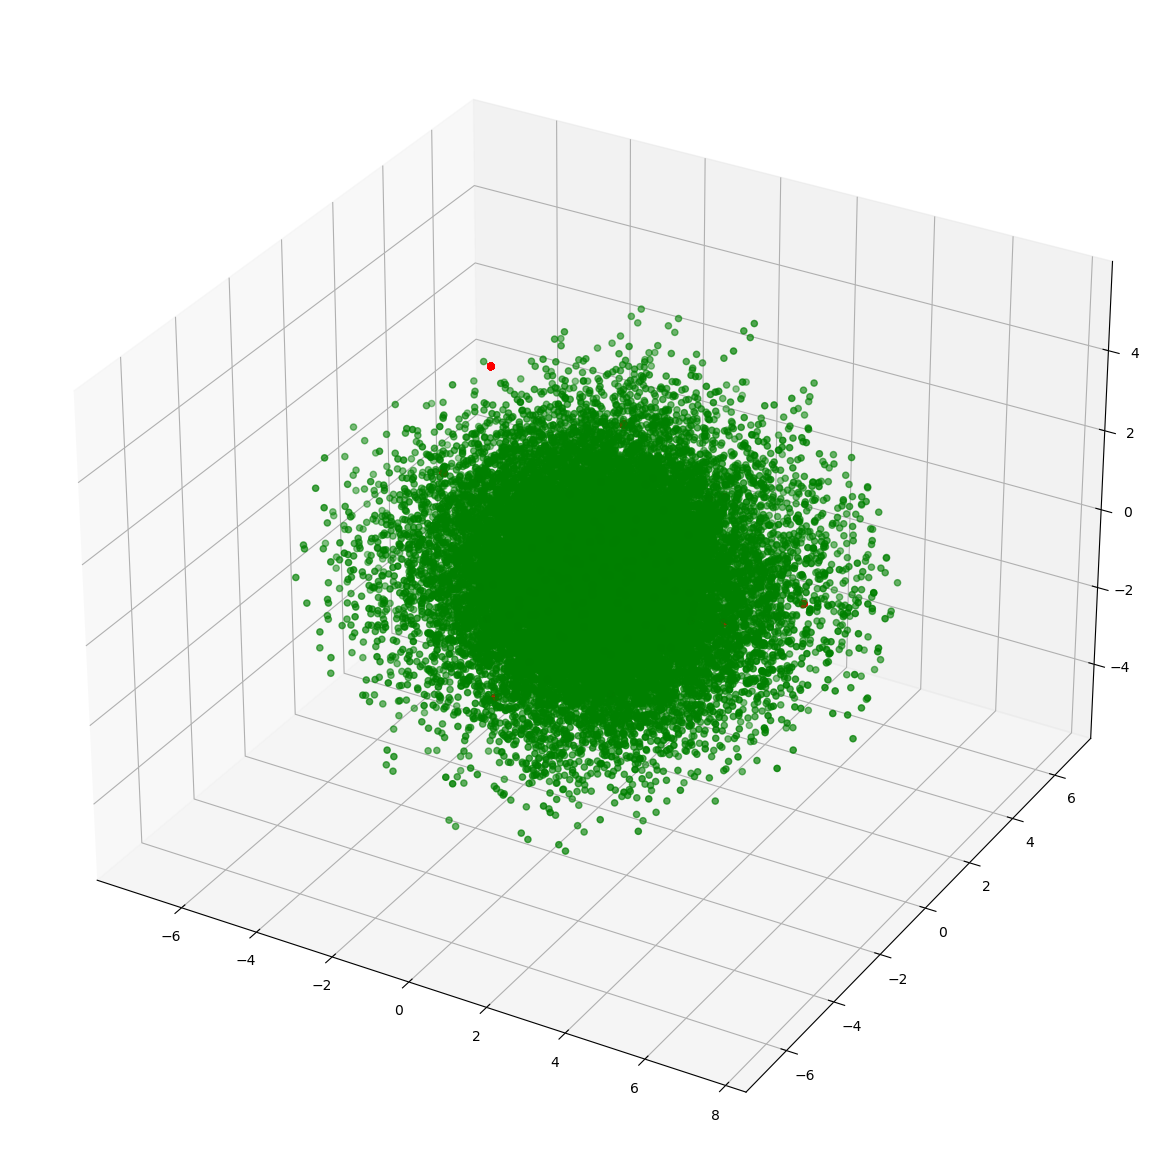

In [88]:
fig = plt.figure(figsize = (15, 15))
ax = plt.axes(projection = '3d')

ax.scatter(reduced_ap_3d[:, 0], reduced_ap_3d[:, 1], reduced_ap_3d[:, 2], color='red', label='positive example')
ax.scatter(reduced_an_3d[:, 0], reduced_an_3d[:, 1], reduced_an_3d[:, 2], color='green', label='negative example')

plt.show()

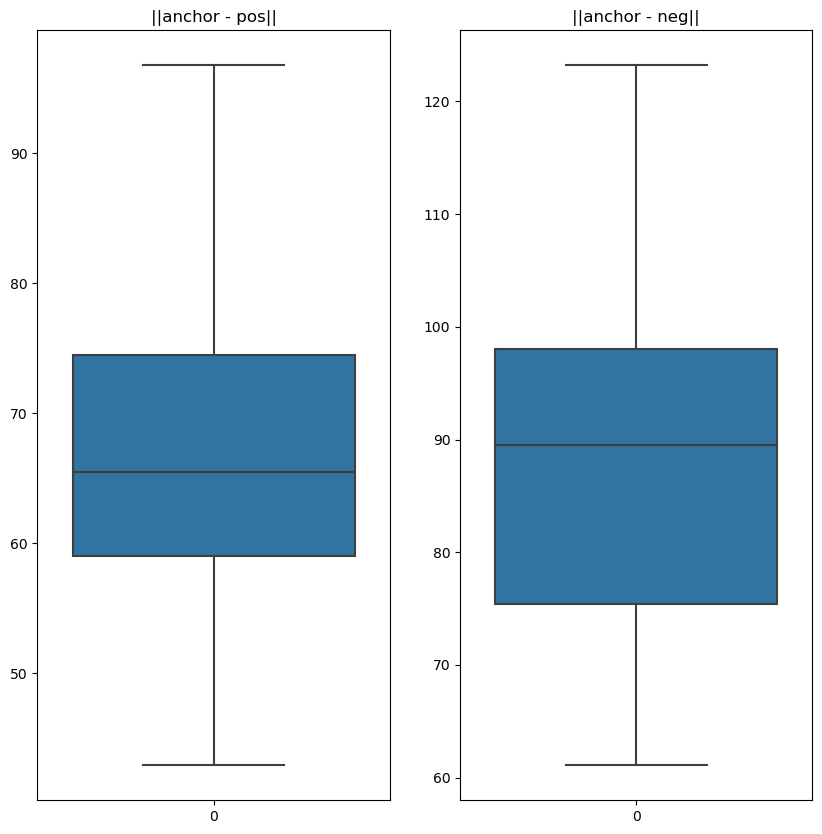

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
sns.boxplot(np.linalg.norm(anchor_pos, axis=0), ax=axs[0])
sns.boxplot(np.linalg.norm(anchor_neg, axis=0), ax=axs[1])
axs[0].set_title('||anchor - pos||')
axs[1].set_title('||anchor - neg||')
plt.show()

In [91]:
gm = GaussianMixture(n_components=2, random_state=0)
gm.fit(anchor_pos)

GaussianMixture(n_components=2, random_state=0)

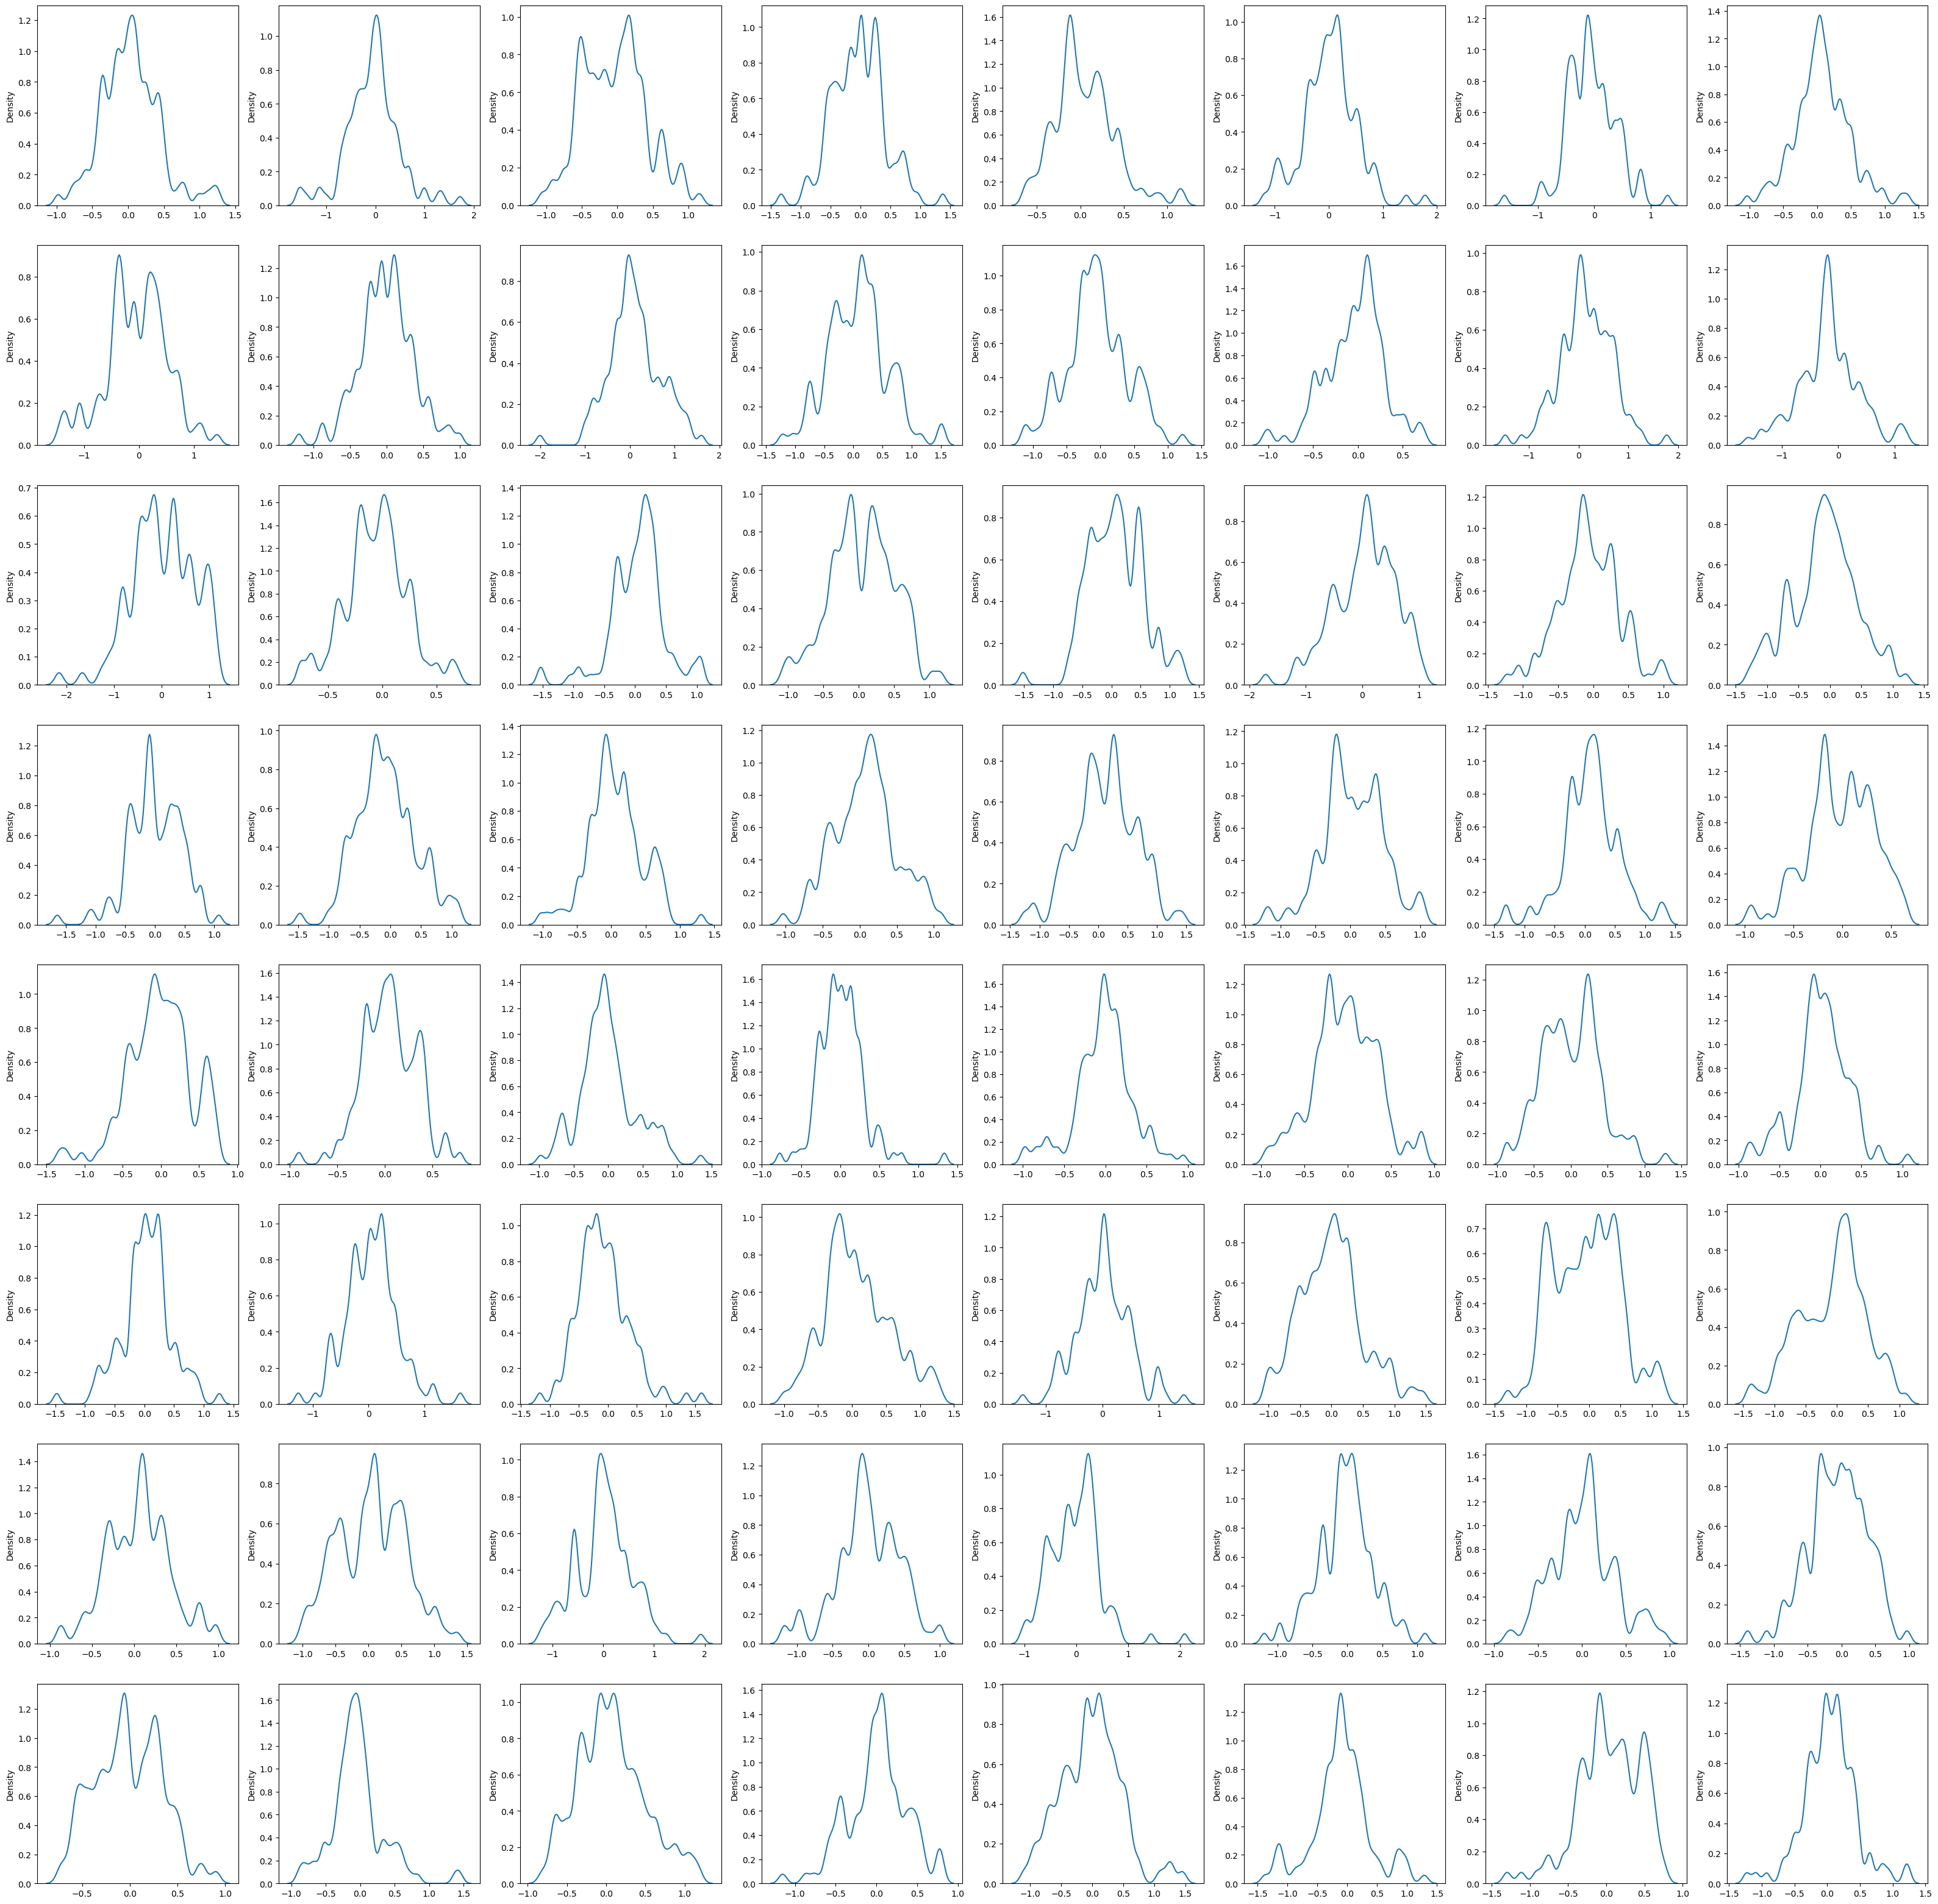

In [103]:
fig, axs = plt.subplots(8, 8, figsize=(40, 40))

for i in range(8):
    for j in range(8):
        sns.kdeplot(anchor_pos[:, i * 8 + j], ax=axs[i, j])wo

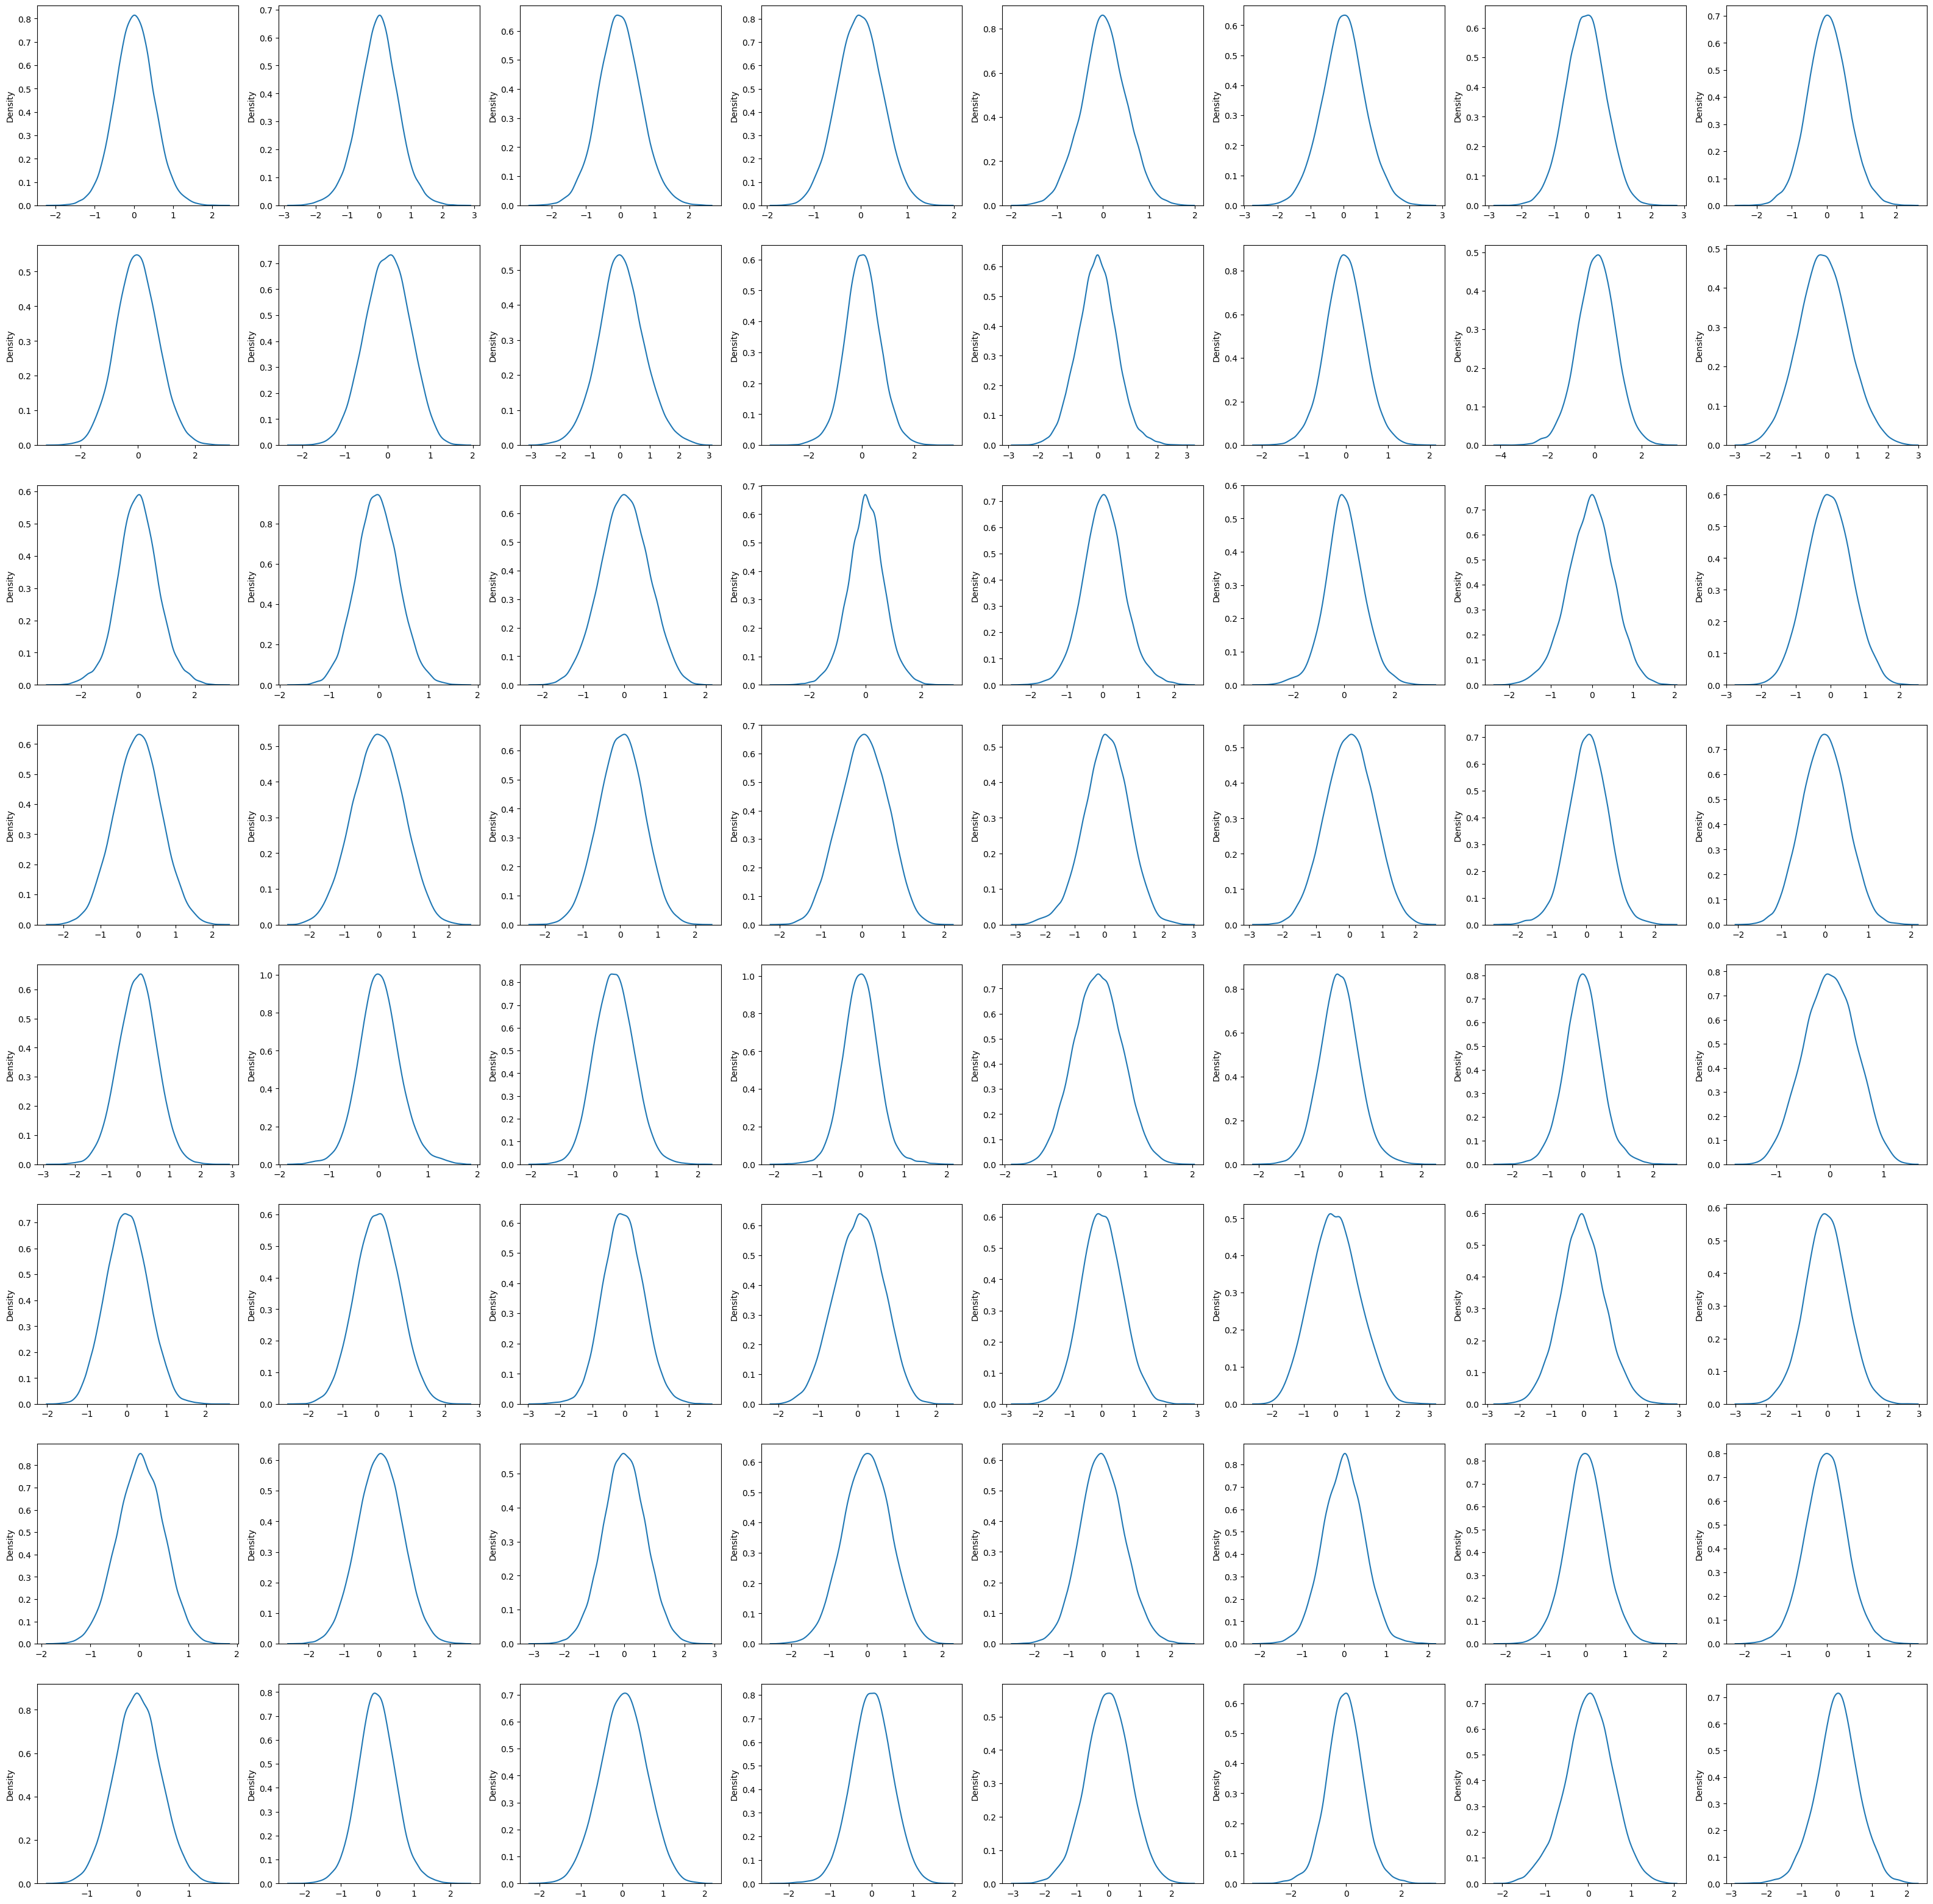

In [104]:
fig, axs = plt.subplots(8, 8, figsize=(40, 40))

for i in range(8):
    for j in range(8):
        sns.kdeplot(anchor_neg[:, i * 8 + j], ax=axs[i, j])

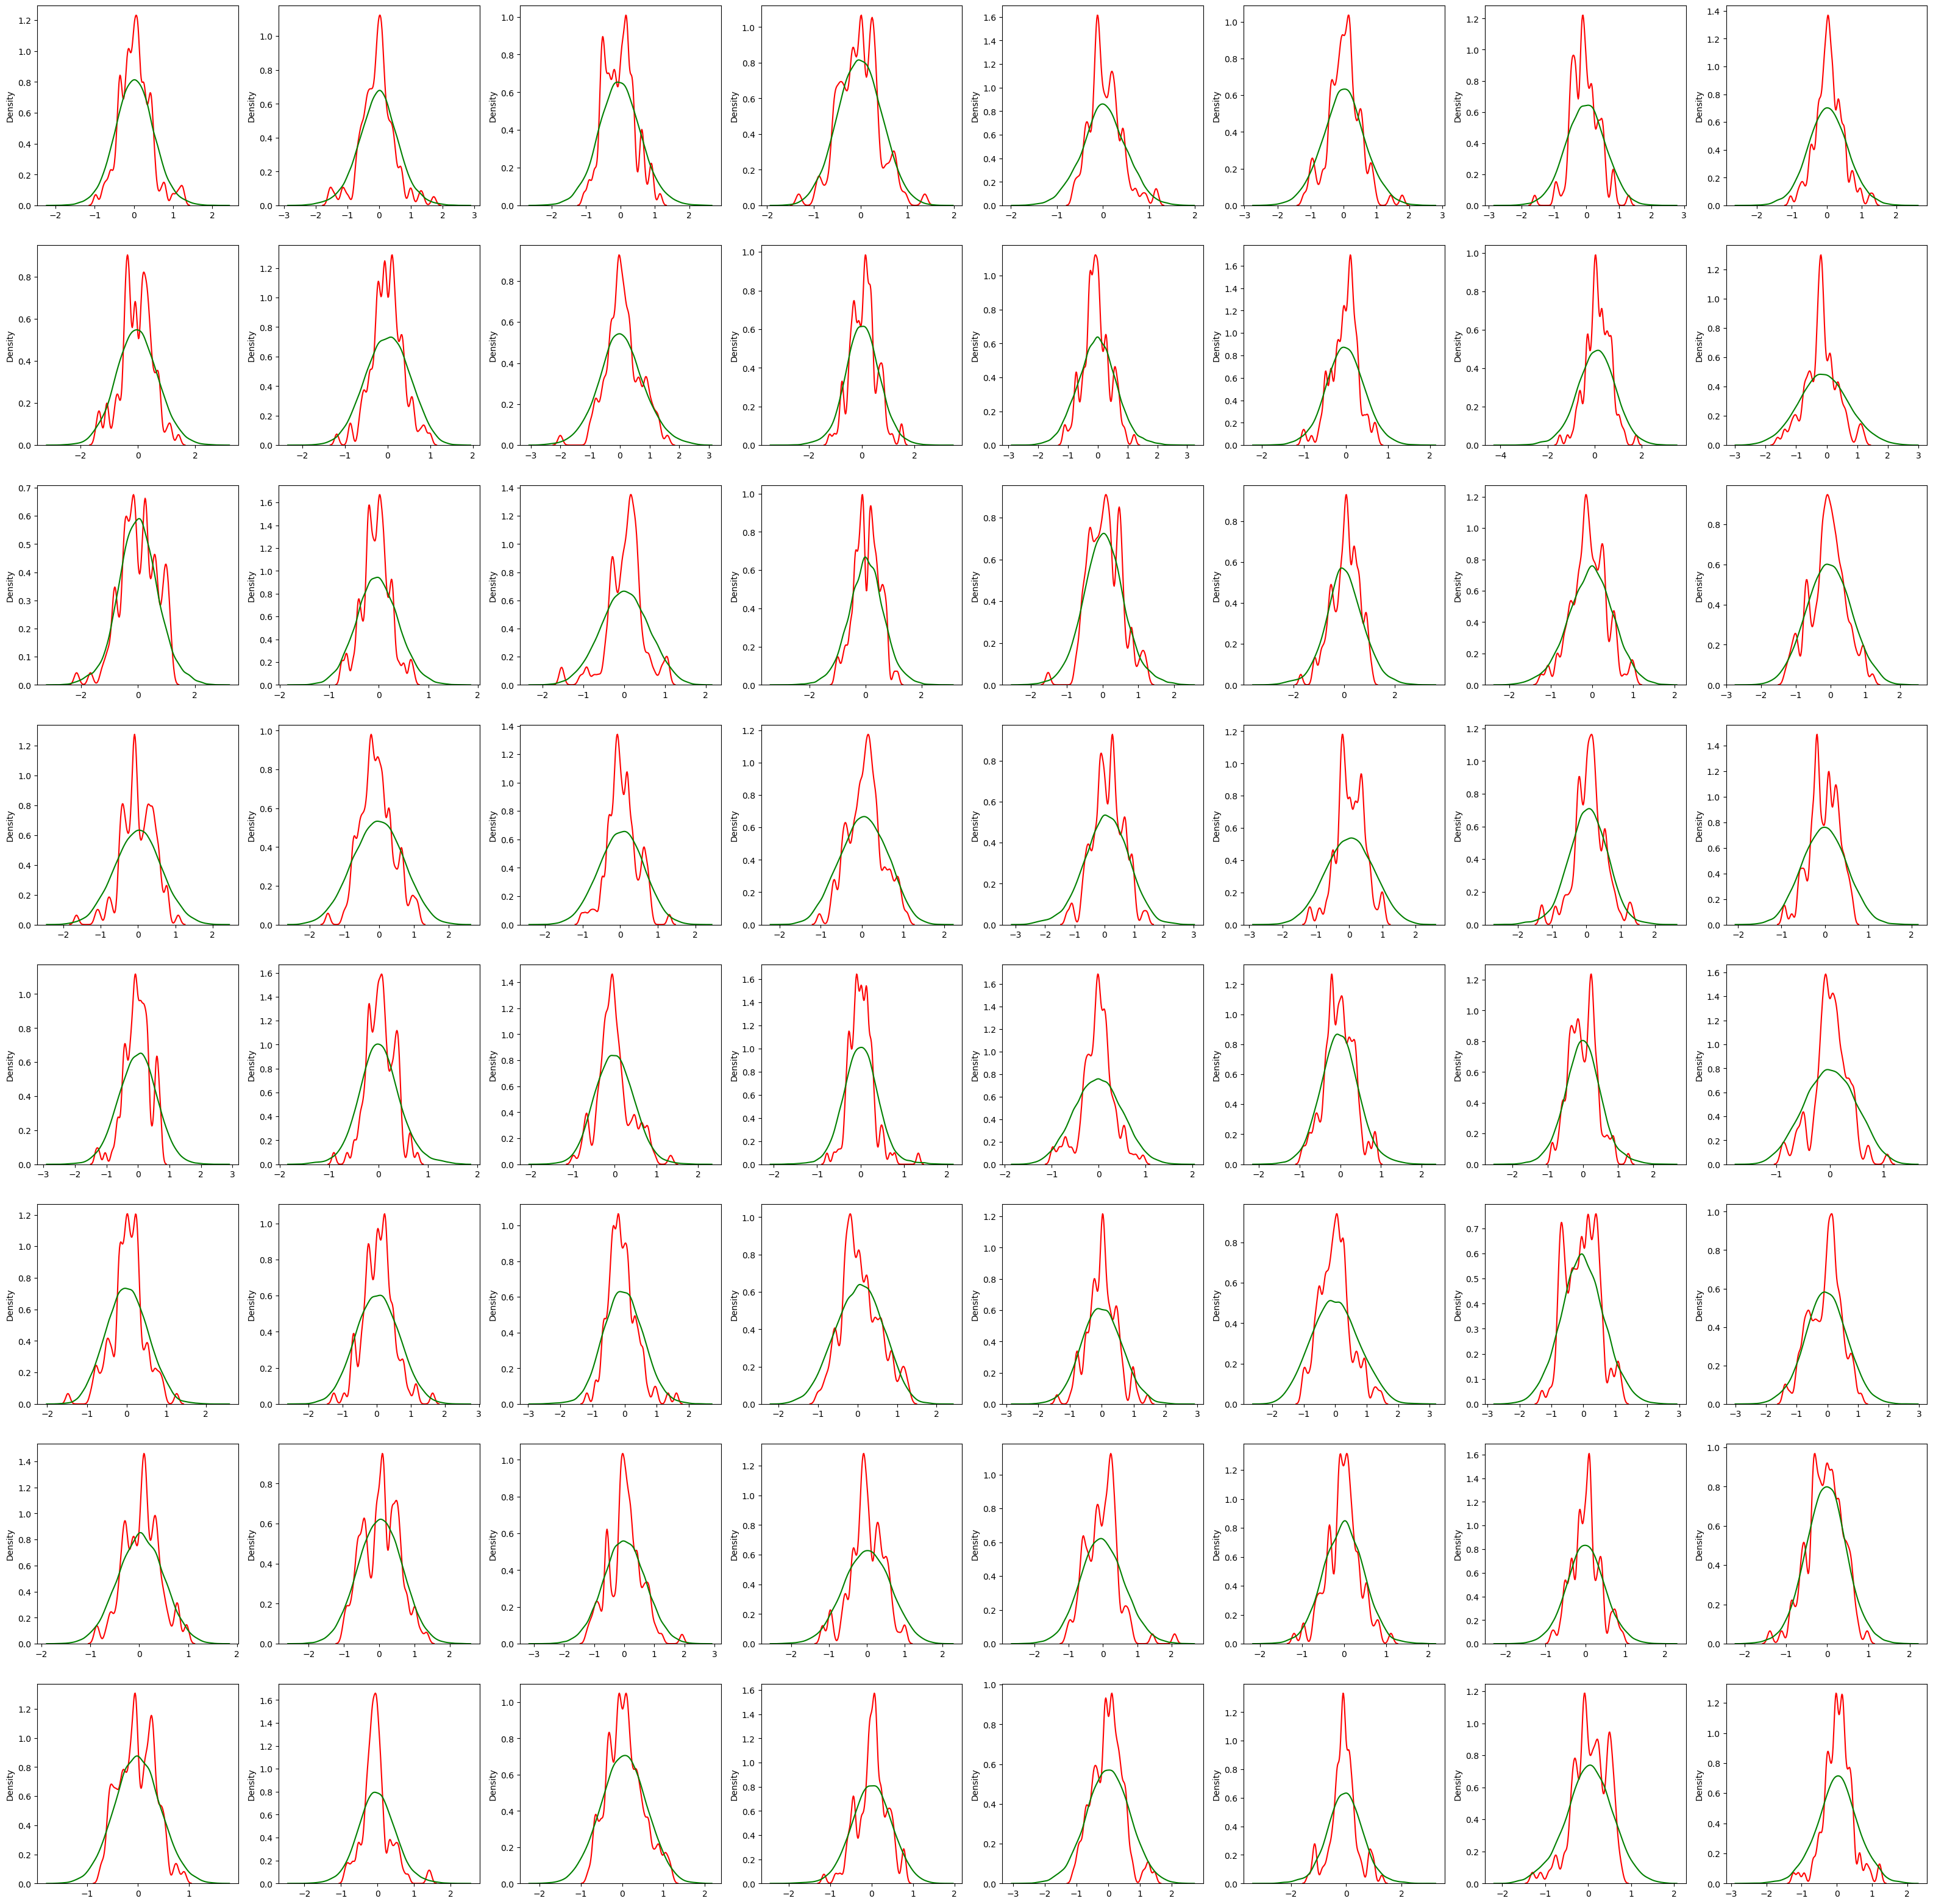

In [105]:
fig, axs = plt.subplots(8, 8, figsize=(40, 40))

for i in range(8):
    for j in range(8):
        sns.kdeplot(anchor_pos[:, i * 8 + j], ax=axs[i, j], color='red')
        sns.kdeplot(anchor_neg[:, i * 8 + j], ax=axs[i, j], color='green')